In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from transformers import (
    T5Tokenizer,
    # TFT5ForConditionalGeneration,
    PegasusTokenizer,
    # TFPegasusForConditionalGeneration,
)

/Users/andyguinto/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open('train_test_split.pkl', 'rb') as file:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(file)

In [4]:
# # Load the T5 tokenizer.
# t5_model_name = 't5-base'
# t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)

# # Load the PEGASUS tokenizer.
# pegasus_model_name = 'google/pegasus-xsum'
# pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_name)

# t5_tokenizer.save_pretrained("/content/drive/MyDrive/t5_default_tokenizer/")
# pegasus_tokenizer.save_pretrained("/content/drive/MyDrive/pegasus_default_tokenizer")

# t5_tokenizer = T5Tokenizer.from_pretrained("t5_default_tokenizer")
# pegasus_tokenizer = PegasusTokenizer.from_pretrained("pegasus_default_tokenizer")

In [5]:
def get_token_counts(input_text, tokenizer):
  return len(tokenizer.encode(input_text))

def get_percentile(token_count_list, percentile):
  series = pd.Series(token_count_list)
  return series.quantile(percentile)

In [6]:
# subset_size = 10000

# # T5 - Train
# t5_train_input_lengths = [get_token_counts(input_text, t5_tokenizer) for input_text in X_train[:subset_size]]
# t5_train_summary_lengths = [get_token_counts(summary, t5_tokenizer) for summary in y_train[:subset_size]]
# print(f"T5 Train input lengths: {t5_train_input_lengths}")
# print(f"T5 Train summary lengths: {t5_train_summary_lengths}")
# print("\n")

# # T5 - Val
# t5_val_input_lengths = [get_token_counts(input_text, t5_tokenizer) for input_text in X_val[:subset_size]]
# t5_val_summary_lengths = [get_token_counts(summary, t5_tokenizer) for summary in y_val[:subset_size]]
# print(f"T5 Val input lengths: {t5_val_input_lengths}")
# print(f"T5 Val summary lengths: {t5_val_summary_lengths}")
# print("\n")

# # T5 - Test
# t5_test_input_lengths = [get_token_counts(input_text, t5_tokenizer) for input_text in X_test[:subset_size]]
# t5_test_summary_lengths = [get_token_counts(summary, t5_tokenizer) for summary in y_test[:subset_size]]
# print(f"T5 Test input lengths: {t5_test_input_lengths}")
# print(f"T5 Test summary lengths: {t5_test_summary_lengths}")
# print("\n")

# # PEGASUS - Train
# pegasus_train_input_lengths = [get_token_counts(input_text, pegasus_tokenizer) for input_text in X_train[:subset_size]]
# pegasus_train_summary_lengths = [get_token_counts(summary, pegasus_tokenizer) for summary in y_train[:subset_size]]
# print(f"PEGASUS Train input lengths: {pegasus_train_input_lengths}")
# print(f"PEGASUS Train summary lengths: {pegasus_train_summary_lengths}")
# print("\n")

# # PEGASUS - Val
# pegasus_val_input_lengths = [get_token_counts(input_text, pegasus_tokenizer) for input_text in X_val[:subset_size]]
# pegasus_val_summary_lengths = [get_token_counts(summary, pegasus_tokenizer) for summary in y_val[:subset_size]]
# print(f"PEGASUS Val input lengths: {pegasus_val_input_lengths}")
# print(f"PEGASUS Val summary lengths: {pegasus_val_summary_lengths}")
# print("\n")

# # PEGASUS - Test
# pegasus_test_input_lengths = [get_token_counts(input_text, pegasus_tokenizer) for input_text in X_test[:subset_size]]
# pegasus_test_summary_lengths = [get_token_counts(summary, pegasus_tokenizer) for summary in y_test[:subset_size]]
# print(f"PEGASUS Test input lengths: {pegasus_test_input_lengths}")
# print(f"PEGASUS Test summary lengths: {pegasus_test_summary_lengths}")

In [7]:
percentile = 0.95

with open('t5_token_lengths.pkl', 'rb') as f:
    t5_token_lengths = pickle.load(f)

with open('pegasus_token_lengths.pkl', 'rb') as f:
    pegasus_token_lengths = pickle.load(f)

In [8]:
t5_train_input_percentile = get_percentile(t5_token_lengths['t5_train_input_lengths'], percentile)
t5_train_summary_percentile = get_percentile(t5_token_lengths['t5_train_summary_lengths'], percentile)
print(f"T5 Train Input {percentile}th Percentile: {[t5_train_input_percentile]}")
print(f"T5 Train Summary {percentile}th Percentile: {t5_train_summary_percentile}")
print("\n")

# T5 - Val
t5_val_input_percentile = get_percentile(t5_token_lengths['t5_val_input_lengths'], percentile)
t5_val_summary_percentile = get_percentile(t5_token_lengths['t5_val_summary_lengths'], percentile)
print(f"T5 Val Input {percentile}th Percentile: {t5_val_input_percentile}")
print(f"T5 Val Summary {percentile}th Percentile: {t5_val_summary_percentile}")
print("\n")

# T5 - Test
t5_test_input_percentile = get_percentile(t5_token_lengths['t5_test_input_lengths'], percentile)
t5_test_summary_percentile = get_percentile(t5_token_lengths['t5_test_summary_lengths'], percentile)
print(f"T5 Test Input {percentile}th Percentile: {t5_test_input_percentile}")
print(f"T5 Test Summary {percentile}th Percentile: {t5_test_summary_percentile}")
print("\n")

# PEGASUS - Train
pegasus_train_input_percentile = get_percentile(pegasus_token_lengths['pegasus_train_input_lengths'], percentile)
pegasus_train_summary_percentile = get_percentile(pegasus_token_lengths['pegasus_train_summary_lengths'], percentile)
print(f"PEGASUS Train Input {percentile}th Percentile: {pegasus_train_input_percentile}")
print(f"PEGASUS Train Summary {percentile}th Percentile: {pegasus_train_summary_percentile}")
print("\n")

# PEGASUS - Val
pegasus_val_input_percentile = get_percentile(pegasus_token_lengths['pegasus_val_input_lengths'], percentile)
pegasus_val_summary_percentile = get_percentile(pegasus_token_lengths['pegasus_val_summary_lengths'], percentile)
print(f"PEGASUS Val Input {percentile}th Percentile: {pegasus_val_input_percentile}")
print(f"PEGASUS Val Summary {percentile}th Percentile: {pegasus_val_summary_percentile}")
print("\n")

# PEGASUS - Test
pegasus_test_input_percentile = get_percentile(pegasus_token_lengths['pegasus_test_input_lengths'], percentile)
pegasus_test_summary_percentile = get_percentile(pegasus_token_lengths['pegasus_test_summary_lengths'], percentile)
print(f"PEGASUS Test Input {percentile}th Percentile: {pegasus_test_input_percentile}")
print(f"PEGASUS Test Summary {percentile}th Percentile: {pegasus_test_summary_percentile}")

T5 Train Input 0.95th Percentile: [np.float64(1046.0)]
T5 Train Summary 0.95th Percentile: 104.0


T5 Val Input 0.95th Percentile: 1044.0
T5 Val Summary 0.95th Percentile: 103.0


T5 Test Input 0.95th Percentile: 1044.0
T5 Test Summary 0.95th Percentile: 103.0


PEGASUS Train Input 0.95th Percentile: 945.0
PEGASUS Train Summary 0.95th Percentile: 93.0


PEGASUS Val Input 0.95th Percentile: 943.0
PEGASUS Val Summary 0.95th Percentile: 93.0


PEGASUS Test Input 0.95th Percentile: 944.0
PEGASUS Test Summary 0.95th Percentile: 92.0


In [17]:
train_inputs = {
    "T5": int(t5_train_input_percentile),
    "PEGASUS":int(pegasus_train_input_percentile)
}

train_summaries = {
    "T5": int(t5_train_summary_percentile),
    "PEGASUS":int(pegasus_train_summary_percentile)
}

val_inputs = {
    "T5": int(t5_val_input_percentile),
    "PEGASUS":int(pegasus_val_input_percentile)
}

val_summaries = {
    "T5": int(t5_val_summary_percentile),
    "PEGASUS":int(pegasus_val_summary_percentile)
}

test_inputs = {
    "T5": int(t5_test_input_percentile),
    "PEGASUS":int(pegasus_test_input_percentile)
}

test_summaries = {
    "T5": int(t5_test_summary_percentile),
    "PEGASUS":int(pegasus_test_summary_percentile)
}

print(train_inputs)
print(val_inputs)
print(test_inputs)

{'T5': 1046, 'PEGASUS': 945}
{'T5': 1044, 'PEGASUS': 943}
{'T5': 1044, 'PEGASUS': 944}


In [60]:
inputs_df = pd.DataFrame({
    "Train Inputs": train_inputs,
    "Val Inputs": val_inputs,
    "Test Inputs": test_inputs,
}).T

summaries_df = pd.DataFrame({
    "Train Summaries": train_summaries,
    "Val Summaries": val_summaries,
    "Test Summaries": test_summaries,
}).T

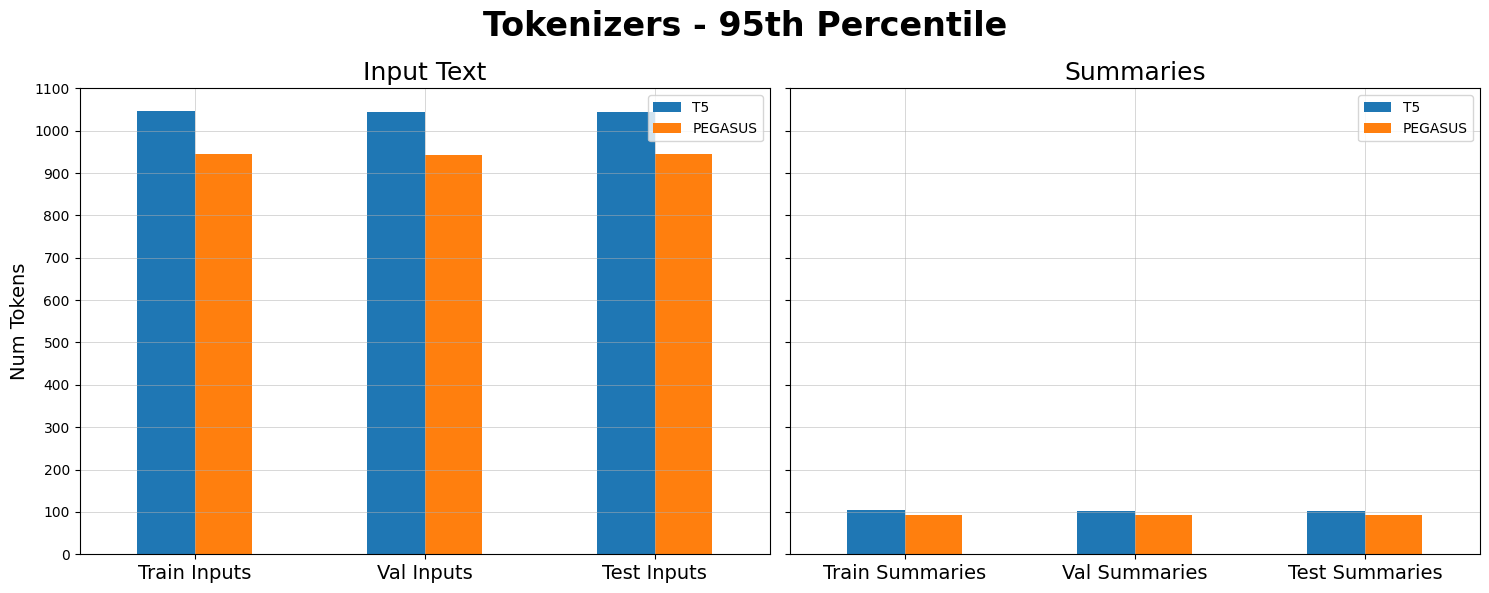

In [108]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=False, sharey=True)

# Plot
inputs_df.plot(kind='bar', ax=axes[0])
summaries_df.plot(kind='bar', ax=axes[1])

# Set Titles
axes[0].set_title("Input Text", fontsize=18)
axes[1].set_title("Summaries", fontsize=18)

# Set Mutual labels
for ax in axes:
    ax.set_ylabel("Num Tokens", fontsize=14)
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.set_yticks(np.arange(0, 1200, 100))
    ax.grid(linestyle='solid', linewidth=0.5, alpha=0.7)
# Set custom ticks for Summaries plot
# plt.ylabel("Num Tokens")
# plt.xticks(rotation=0, fontsize=12)
fig.suptitle("Tokenizers - 95th Percentile", fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

